## 🔍 Problema de Negócio Visualizado

Uma operadora de serviços de telecomunicação está enfrentando dificuldades para reter clientes, o que afeta diretamente sua receita recorrente e estabilidade operacional. Muitos cancelamentos acontecem sem que a empresa consiga agir de forma preventiva. 

O objetivo deste projeto é aplicar técnicas de **Machine Learning** para prever a probabilidade de um cliente encerrar o contrato, possibilitando a criação de estratégias de **retenção mais eficazes**.

## 📚 Dicionário dos Dados

O dataset, disponibilizado pela IBM, possui informações sobre mais de 7.000 clientes, contendo atributos contratuais, demográficos e de uso de serviços.

- `customerID`: Identificador único do cliente  
- `gender`: Gênero do cliente  
- `SeniorCitizen`: Se o cliente é idoso (1) ou não (0)  
- `Partner`: Se o cliente tem cônjuge (Yes/No)  
- `Dependents`: Se o cliente possui dependentes (Yes/No)  
- `tenure`: Tempo de permanência do cliente (em meses)  
- `PhoneService`: Se possui serviço telefônico  
- `MultipleLines`: Se possui múltiplas linhas telefônicas  
- `InternetService`: Tipo de serviço de internet (DSL, Fiber optic ou None)  
- `OnlineSecurity`: Se contratou serviço de segurança online  
- `OnlineBackup`: Se contratou backup online  
- `DeviceProtection`: Se possui proteção para dispositivo  
- `TechSupport`: Se possui suporte técnico contratado  
- `StreamingTV`: Se contratou serviço de streaming de TV  
- `StreamingMovies`: Se contratou serviço de streaming de filmes  
- `Contract`: Tipo de contrato (Month-to-month, One year, Two year)  
- `PaperlessBilling`: Se o cliente utiliza fatura digital  
- `PaymentMethod`: Forma de pagamento  
- `MonthlyCharges`: Valor mensal da cobrança  
- `TotalCharges`: Total já pago pelo cliente  
- `Churn`: Se o cliente cancelou o serviço no último mês (Yes/No)

#### Import das bibliotecas

In [32]:
# Manipulação e visualização de dados
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Controle de warnings 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [33]:
df = pd.read_parquet("../data/dados_banco.parquet")

In [34]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observações:
- Não há dados repetidos, igualmente dados faltantes nas colunas observadas.
- Quase todos os campos estão em formato de texto, mas precisarão ser convertidos no futuro para variáveis via OHE ou Label Encoder

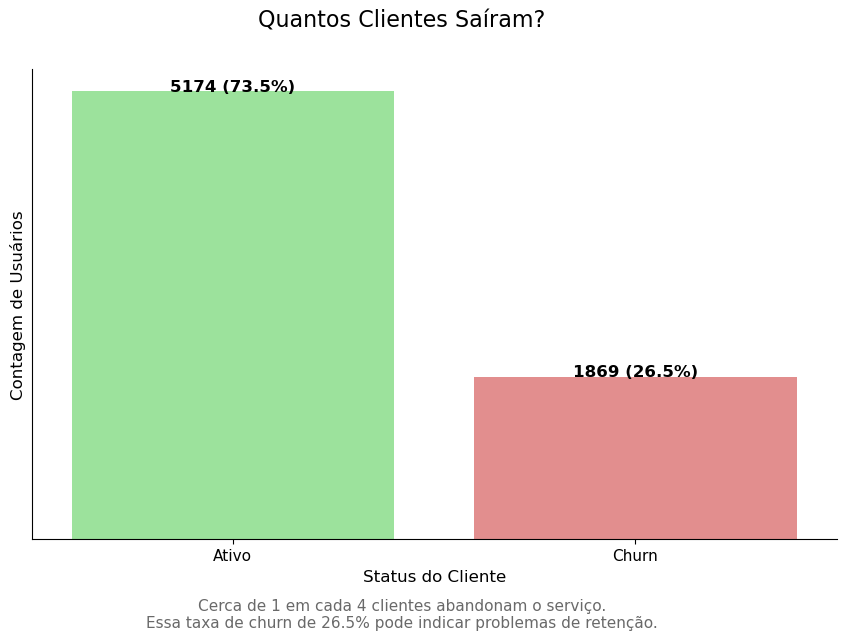

In [37]:
custom_palette = {'Yes': 'lightcoral', 'No': 'lightgreen'}

contagem = df['Churn'].value_counts()
percentual = df['Churn'].value_counts(normalize=True) * 100

categorias = contagem.index.tolist()  # ['No', 'Yes']

plot = sns.catplot(
    x='Churn',
    data=df,
    kind='count',
    palette=custom_palette,
    height=6,
    aspect=1.5
)

plot.fig.suptitle('Quantos Clientes Saíram?', fontsize=16)
plot.fig.subplots_adjust(top=0.88)

for ax in plot.axes.flatten():
    ax.set_xlabel("Status do Cliente", fontsize=12)
    ax.set_ylabel("Contagem de Usuários", fontsize=12)
    ax.set_yticks([])
    ax.tick_params(left=False)

    ax.set_xticklabels(['Ativo', 'Churn'], fontsize=11)

    for i, p in enumerate(ax.patches):
        valor = int(p.get_height())
        categoria = categorias[i]

        ax.text(
            p.get_x() + p.get_width() / 2.,
            valor + 8,
            f"{valor} ({percentual[categoria]:.1f}%)",
            ha="center",
            fontsize=12,
            weight='bold'
        )

churn_rate = percentual['Yes']

churn_frac = round(100 / churn_rate)

comentario = (
    f"Cerca de 1 em cada {churn_frac} clientes abandonam o serviço.\n"
    f"Essa taxa de churn de {churn_rate:.1f}% pode indicar problemas de retenção."
)

plot.fig.text(
    0.5, -0.05,
    comentario,
    ha='center',
    fontsize=11,
    color='dimgray'
)
plt.show()

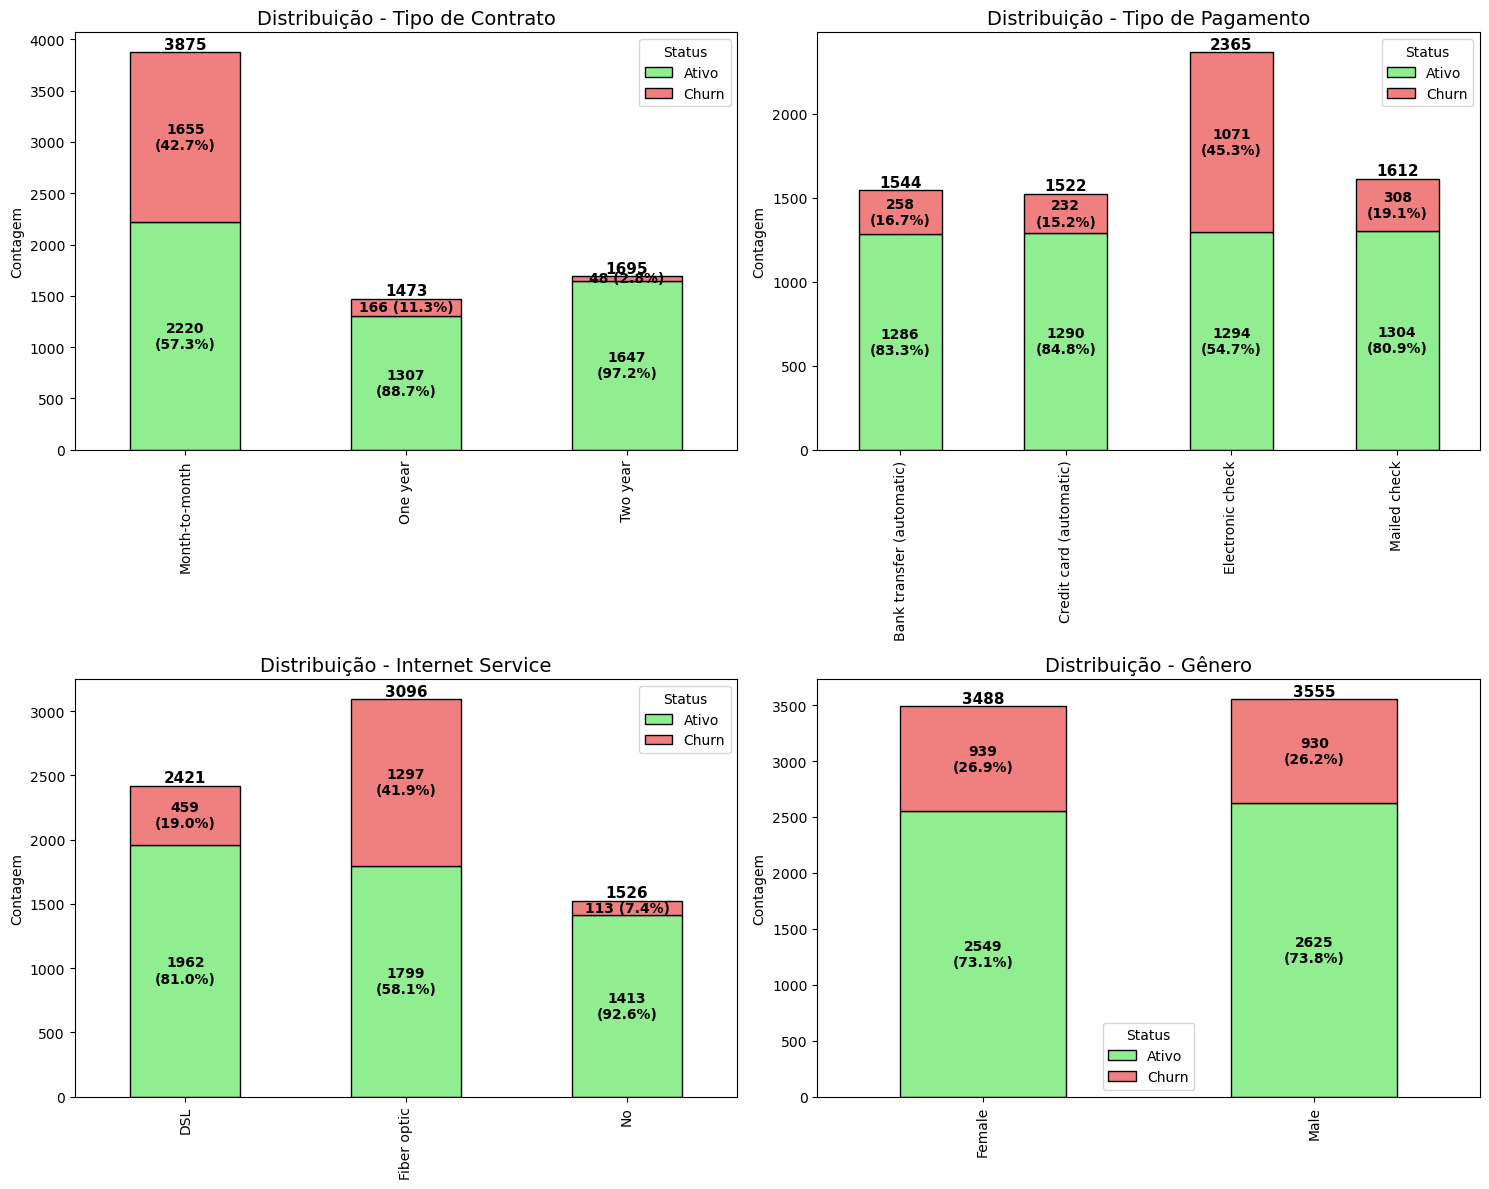

In [ ]:
label_map = {'Yes': 'Churn', 'No': 'Ativo'}
custom_colors = {'Ativo': 'lightgreen', 'Churn': 'lightcoral'}

features = ['Contract', 'PaymentMethod', 'InternetService', 'gender']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

def plot_stacked_bars(ax, feature, title):
    ct = pd.crosstab(df[feature], df['Churn'])

    ct.columns = [label_map.get(col, col) for col in ct.columns]

    if 'Ativo' in ct.columns and 'Churn' in ct.columns:
        ct = ct[['Ativo', 'Churn']]

    colors = [custom_colors.get(col, 'skyblue') for col in ct.columns]

    ct.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black')
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Contagem')
    ax.set_xlabel('')
    ax.legend(title='Status')

    for i, bar_group in enumerate(ax.containers):
        for j, rect in enumerate(bar_group):
            height = rect.get_height()
            if height > 0:
                total = ct.iloc[j].sum()
                percentual = (height / total) * 100
                if percentual >= 15:
                    label = f"{int(height)}\n({percentual:.1f}%)"
                else:
                    label = f"{int(height)} ({percentual:.1f}%)"
                ax.text(
                    rect.get_x() + rect.get_width() / 2.,
                    rect.get_y() + height / 2.,
                    label,
                    ha='center', va='center', fontsize=10, color='black', weight='bold'
                )

    for idx, total in enumerate(ct.sum(axis=1)):
        ax.text(
            idx,
            total + 3,
            f"{int(total)}",
            ha='center', va='bottom', fontsize=11, weight='bold'
        )

plot_stacked_bars(axes[0, 0], 'Contract', 'Distribuição - Tipo de Contrato')
plot_stacked_bars(axes[0, 1], 'PaymentMethod', 'Distribuição - Tipo de Pagamento')
plot_stacked_bars(axes[1, 0], 'InternetService', 'Distribuição - Internet Service')
plot_stacked_bars(axes[1, 1], 'gender', 'Distribuição - Gênero')

plt.tight_layout()
plt.show()

In [ ]:
def plot_stacked_bars_segmentado(ax, df_input, feature, title):
    ct = pd.crosstab(df_input[feature], df_input['Churn'])
    ct.columns = [label_map.get(col, col) for col in ct.columns]
    if 'Ativo' in ct.columns and 'Churn' in ct.columns:
        ct = ct[['Ativo', 'Churn']]
    colors = [custom_colors.get(col, 'skyblue') for col in ct.columns]

    ct.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black')
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Contagem')
    ax.set_xlabel('')
    ax.legend(title='Status')

    for i, bar_group in enumerate(ax.containers):
        for j, rect in enumerate(bar_group):
            height = rect.get_height()
            if height > 0:
                total = ct.iloc[j].sum()
                percentual = (height / total) * 100
                if percentual >= 15:
                    label = f"{int(height)}\n({percentual:.1f}%)"
                else:
                    label = f"{int(height)} ({percentual:.1f}%)"
                ax.text(
                    rect.get_x() + rect.get_width() / 2.,
                    rect.get_y() + height / 2.,
                    label,
                    ha='center', va='center', fontsize=10, color='black', weight='bold'
                )

    for idx, total in enumerate(ct.sum(axis=1)):
        ax.text(
            idx,
            total + 3,
            f"{int(total)}",
            ha='center', va='bottom', fontsize=11, weight='bold'
        )


In [ ]:
df_segmento = df[df['Contract'] == 'Month-to-month']

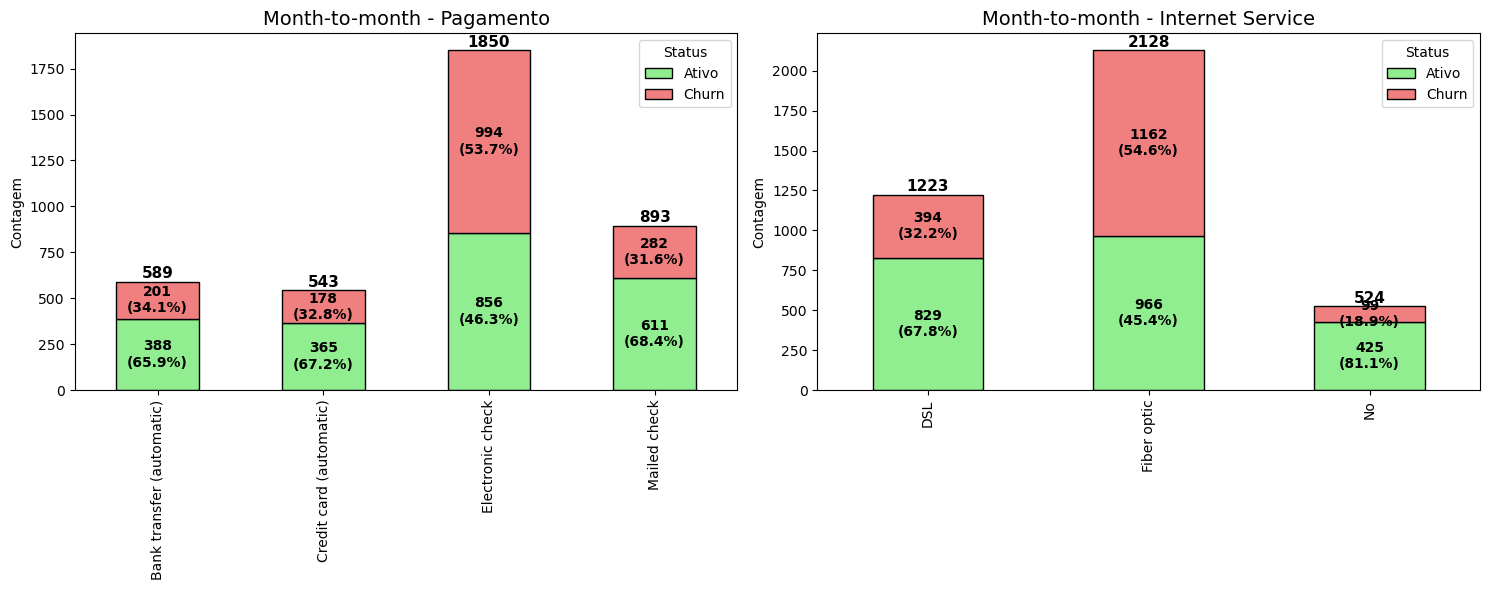

In [62]:
df_monthly = df[df['Contract'] == 'Month-to-month']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_stacked_bars_segmentado(axes[0], df_monthly, 'PaymentMethod', 'Month-to-month - Pagamento')
plot_stacked_bars_segmentado(axes[1], df_monthly, 'InternetService', 'Month-to-month - Internet Service')
plt.tight_layout()
plt.show()

## Análise Segmentada: Clientes com Contrato Month-to-month

### Método de Pagamento
- **Electronic check** possui a **maior taxa de churn (53.7%)**
- Outras formas de pagamento apresentam churn entre **31% e 34%**

Mesmo dentro do grupo com contrato mensal, o **método de pagamento influencia fortemente o churn**.


### Tipo de Internet
- **Fiber optic** lidera com **churn de 54.6%**
- DSL: **32.2%**
- Sem internet: **18.9%**

O problema de churn com fibra **persiste mesmo quando isolamos apenas os clientes com contrato mensal**.


### Conclusão
Clientes que combinam:
- Contrato **Month-to-month**
- Pagamento via **Electronic check**
- Internet **Fiber optic**

formam um **grupo de alto risco de churn**.

In [63]:
bins = [0, 6, 12, 24, df['tenure'].max()]
labels = ['<6 meses', '6-12 meses', '12-24 meses', '24+ meses']
df['FaixaTenure'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

In [64]:
# Cálculo da taxa de churn (%)
churn_por_faixa = pd.crosstab(df['FaixaTenure'], df['Churn'], normalize='index') * 100
churn_por_faixa = churn_por_faixa.rename(columns={'Yes': 'Churn', 'No': 'Ativo'})


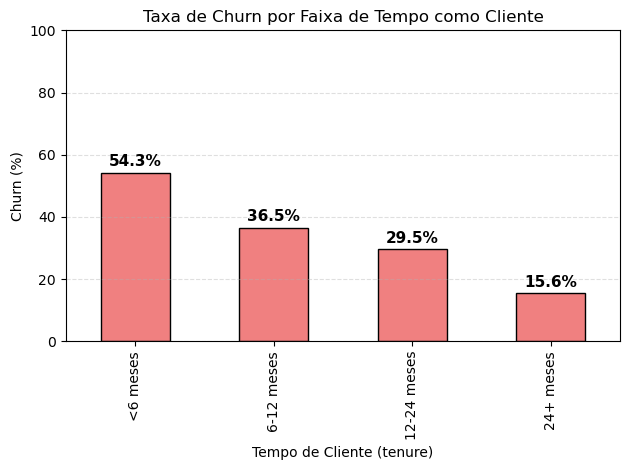

In [65]:
churn_por_faixa['Churn'].plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Taxa de Churn por Faixa de Tempo como Cliente')
plt.ylabel('Churn (%)')
plt.xlabel('Tempo de Cliente (tenure)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adiciona valores no topo
for idx, valor in enumerate(churn_por_faixa['Churn']):
    plt.text(idx, valor + 2, f'{valor:.1f}%', ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()


- O primeiro semestre é um ponto crítico de retenção
- Clientes com mais de 2 anos tendem a ser muito mais fiéis
- Pode indicar que a experiência inicial está impactando a permanência

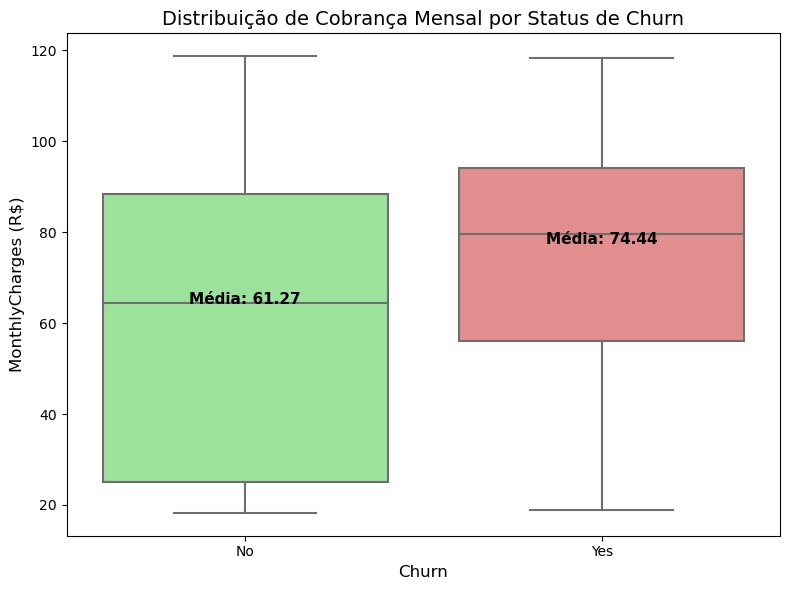

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette={'Yes': 'lightcoral', 'No': 'lightgreen'})

# Título e rótulos
plt.title('Distribuição de Cobrança Mensal por Status de Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('MonthlyCharges (R$)', fontsize=12)

# Mostrar valores médios (opcional)
medias = df.groupby('Churn')['MonthlyCharges'].mean()
for i, (grupo, media) in enumerate(medias.items()):
    plt.text(i, media + 3, f"Média: {media:.2f}", ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

## Análise: Cobrança Mensal (MonthlyCharges) e Churn: 
- Clientes que cancelam o serviço pagam, em média, mais por mês.

### Interpretação:
- Planos mais caros estão mais associados ao churn
- Pode indicar **baixa percepção de valor** ou **insatisfação com o custo**
- Possível correlação com clientes que têm **mais serviços agregados**